In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
df=sns.load_dataset("titanic")

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [8]:
# Finding the missing data

In [9]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

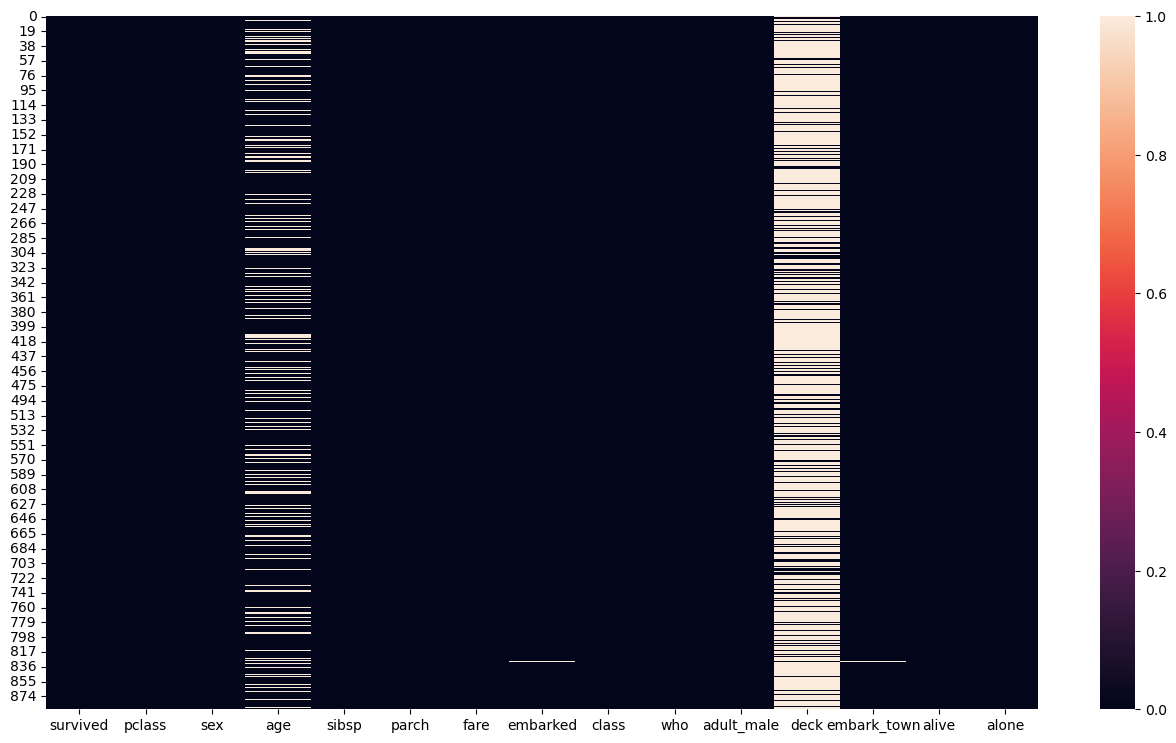

In [10]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='survived', ylabel='count'>

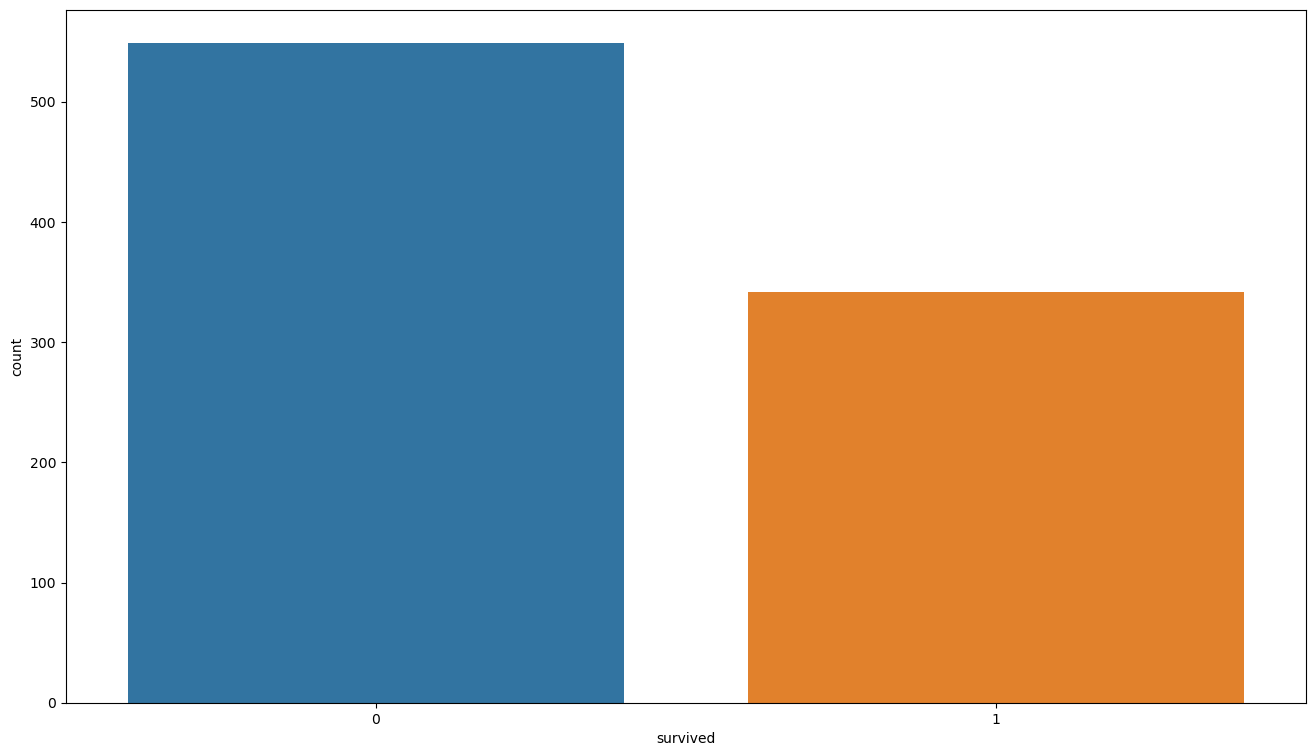

In [11]:
plt.figure(figsize=(16,9))
sns.countplot(x="survived",data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

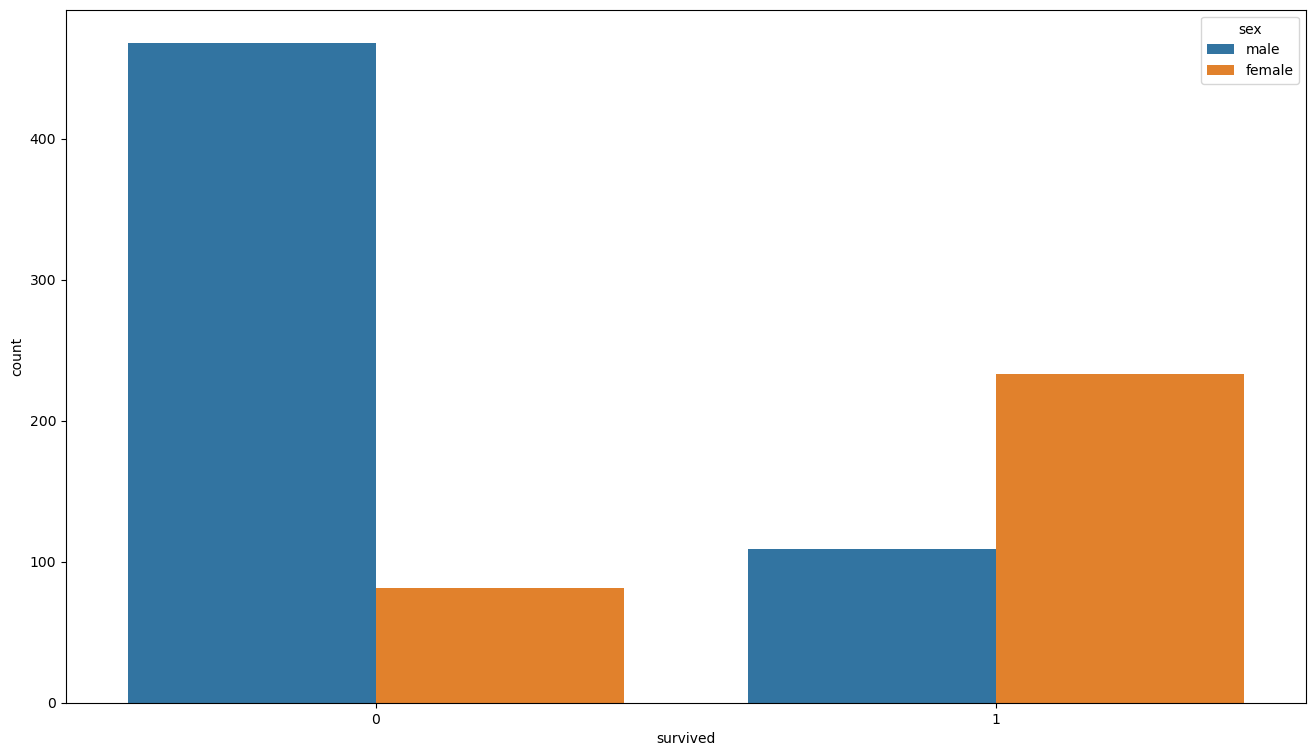

In [12]:
plt.figure(figsize=(16,9))
sns.countplot(x="survived",hue="sex",data=df)

<AxesSubplot:xlabel='survived', ylabel='count'>

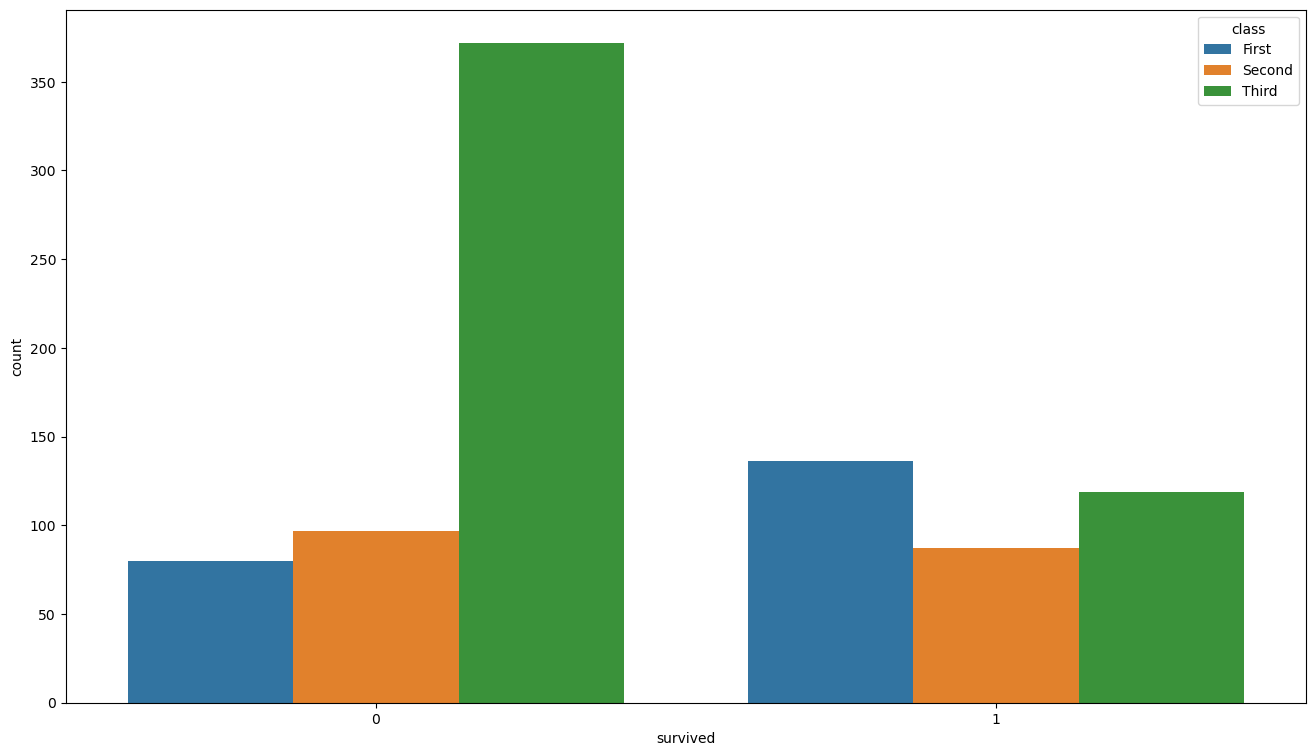

In [13]:
plt.figure(figsize=(16,9))
sns.countplot(x="survived",hue="class",data=df)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

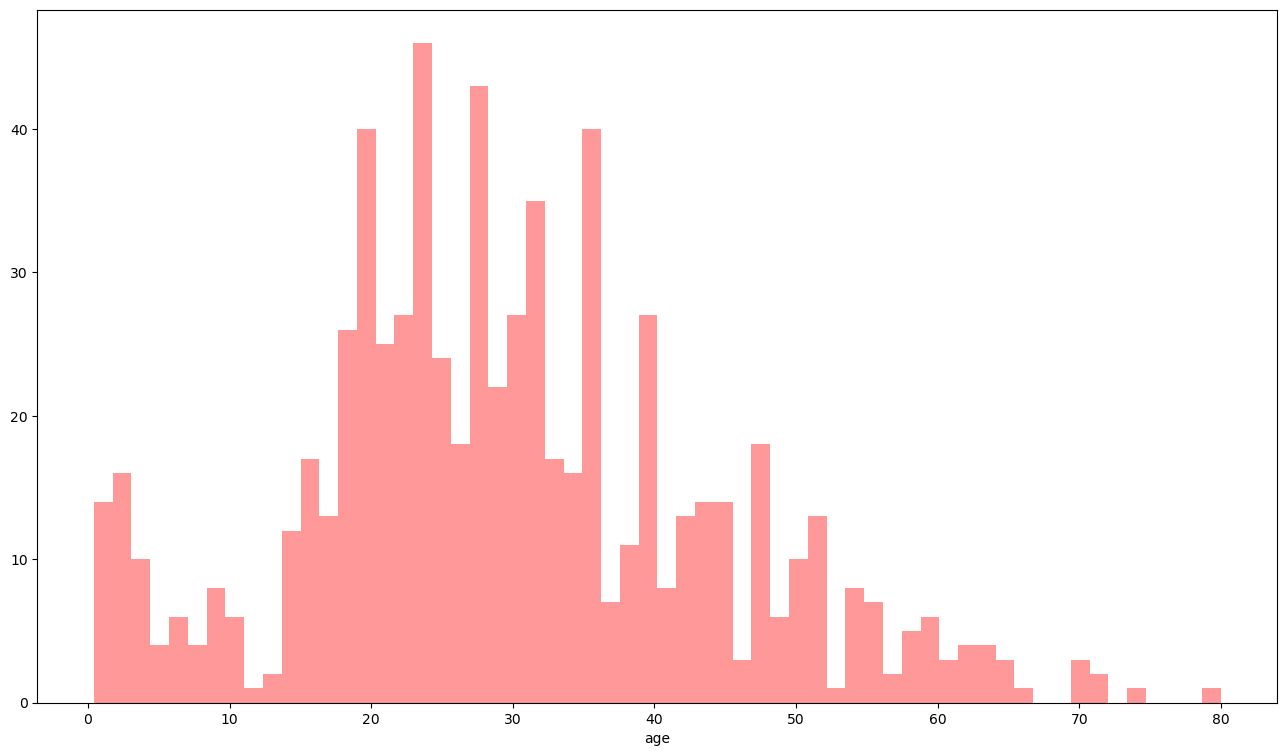

In [14]:
plt.figure(figsize=(16,9))
sns.distplot(df["age"].dropna(),kde=False,color="r",bins=60)

<AxesSubplot:xlabel='sibsp', ylabel='count'>

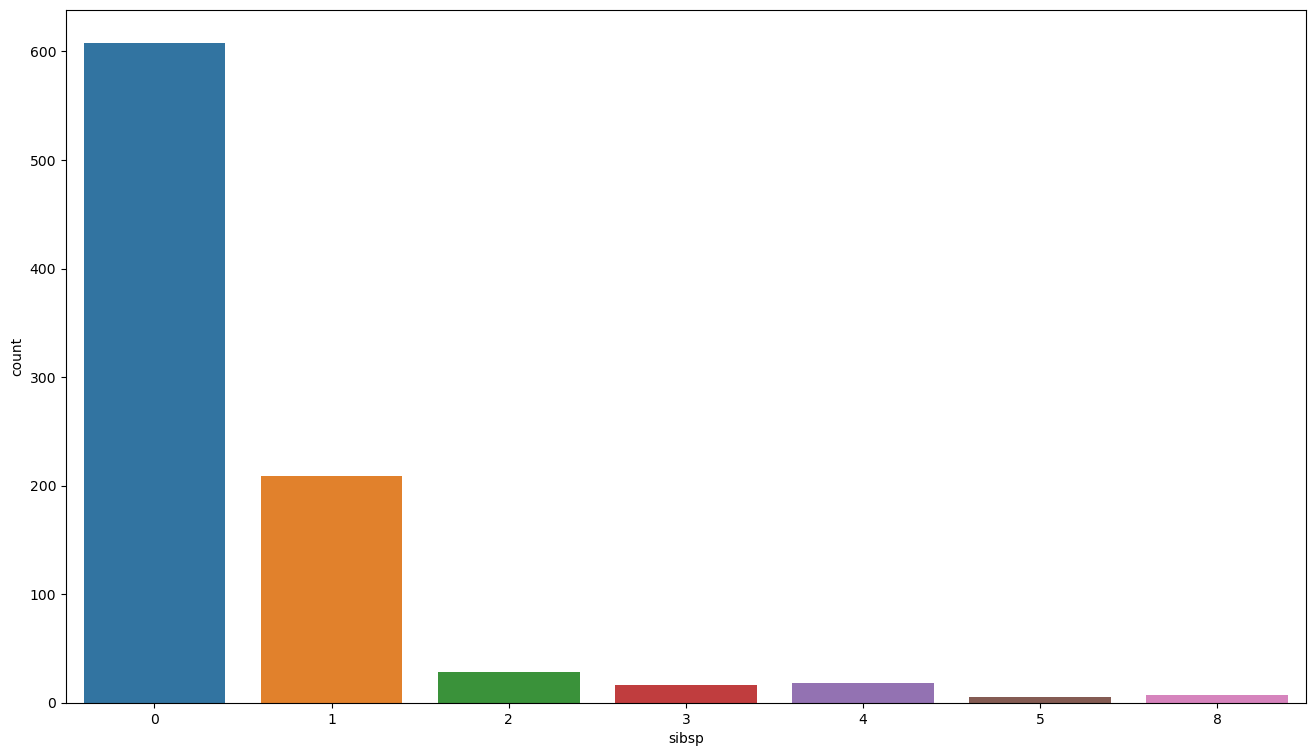

In [15]:
plt.figure(figsize=(16,9))
sns.countplot(x="sibsp",data=df)

<AxesSubplot:xlabel='fare', ylabel='count'>

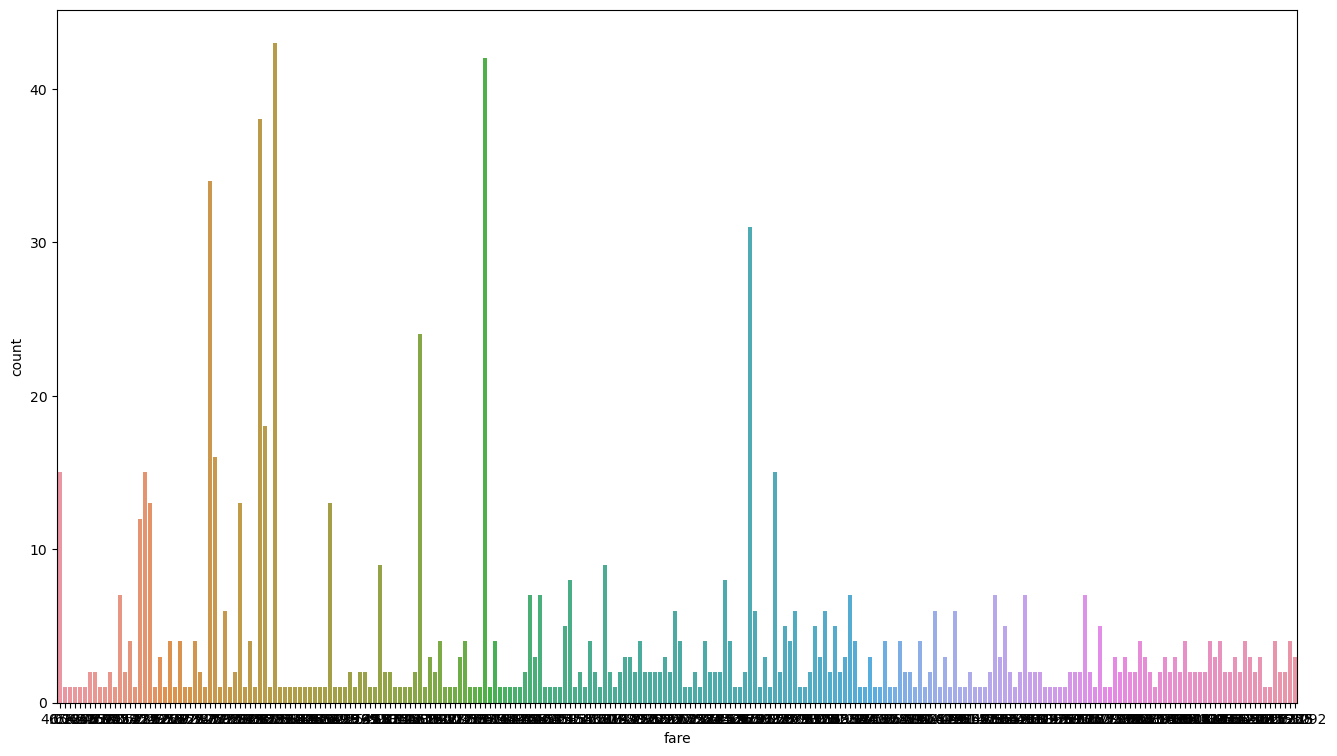

In [16]:
plt.figure(figsize=(16,9))
sns.countplot(x="fare",data=df)

In [17]:
##Data Cleaning

<AxesSubplot:xlabel='class', ylabel='age'>

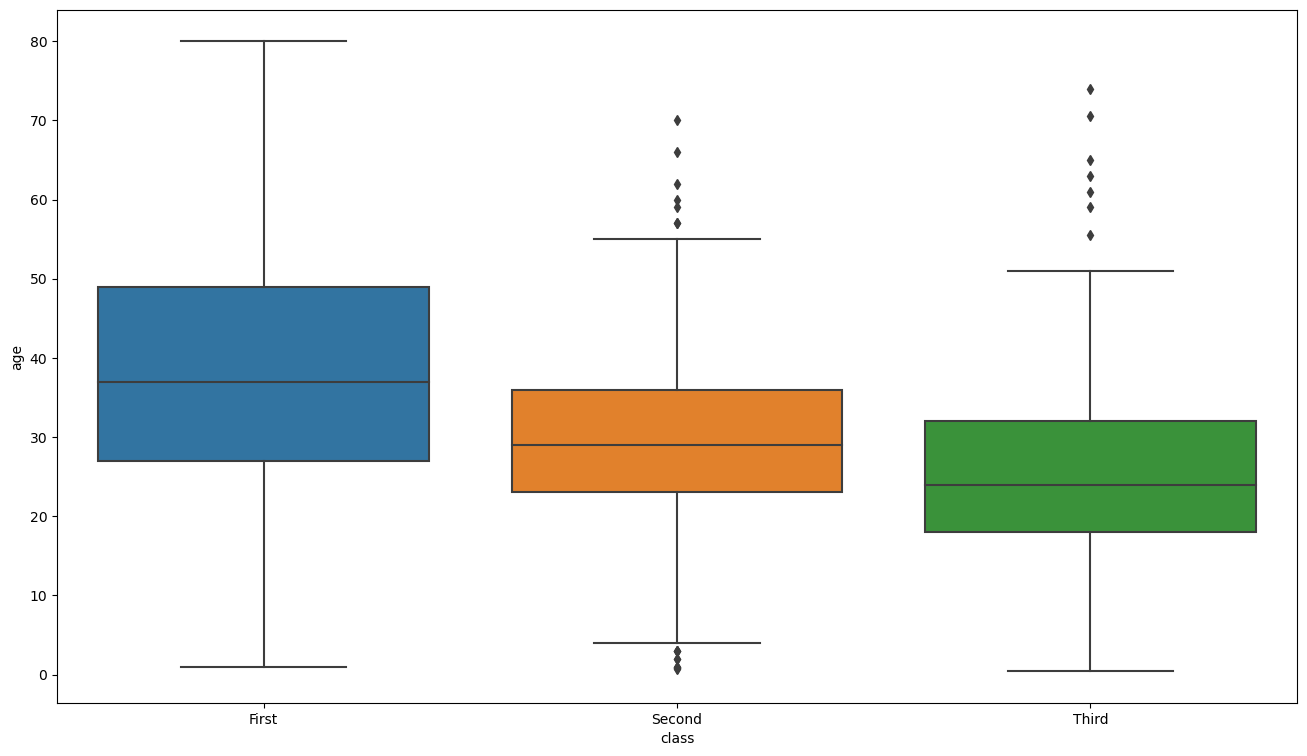

In [18]:
plt.figure(figsize=(16,9))
sns.boxplot(x="class",y="age",data=df)

In [19]:
def impute_age(cols):
    age=cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
   
        if pclass == 1:
           return 37
    
        elif pclass == 2:
            return 29
    
        else:
            return 24
    else:
        return age

In [20]:
df["age"] = df[["age","pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

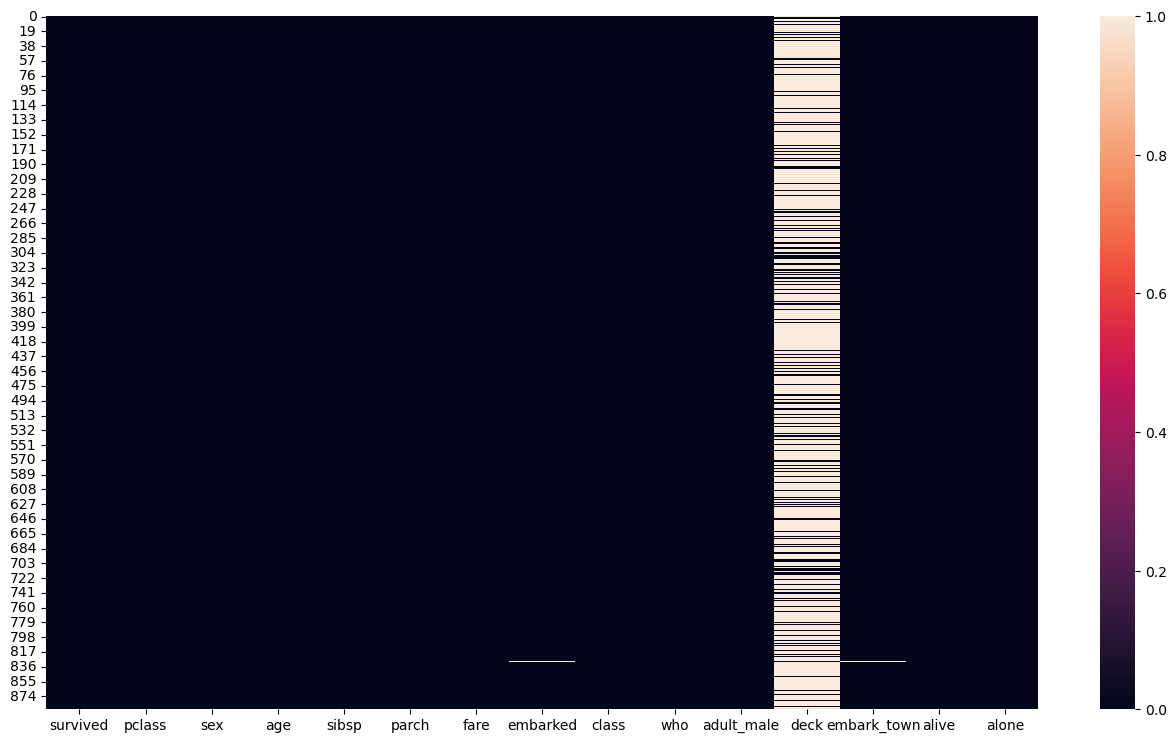

In [21]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [22]:
df.drop("deck",axis=1,inplace=True)

In [23]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


<AxesSubplot:>

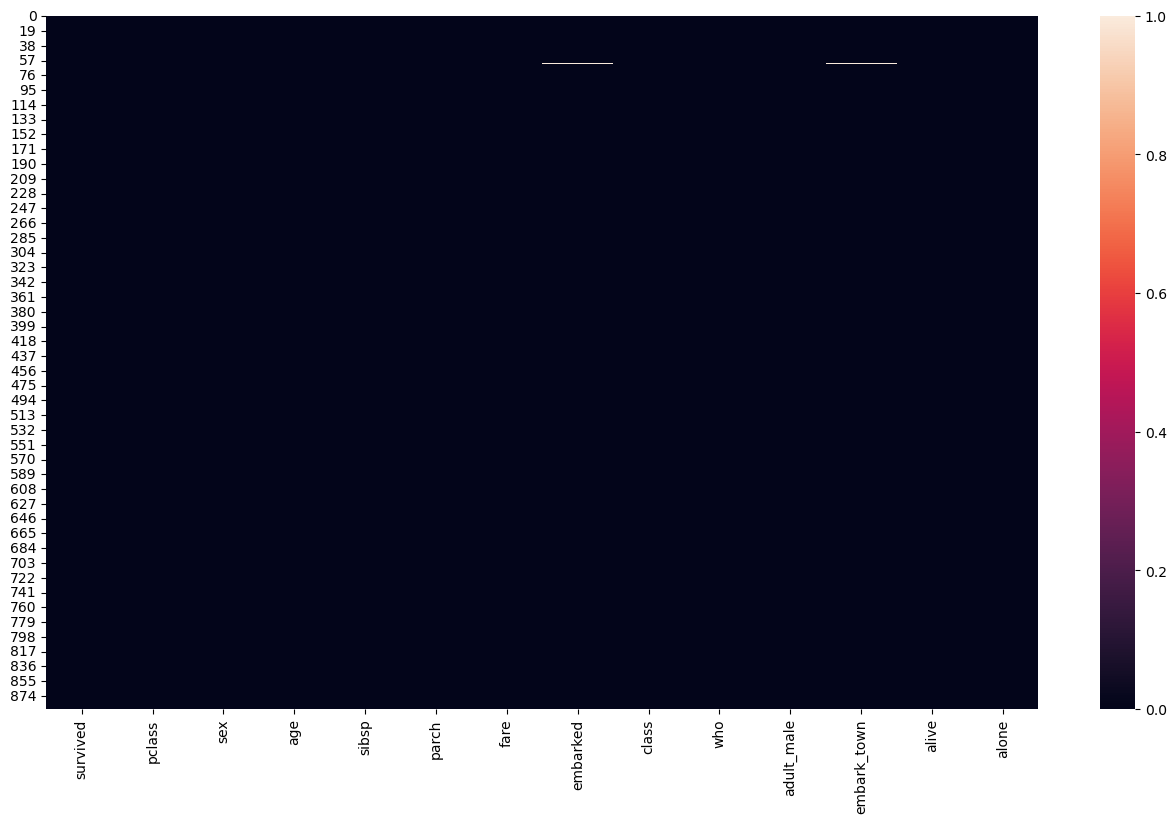

In [24]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [25]:
pd.get_dummies(df["embarked"],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [26]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True
